## The Escape Velocity for Cluster Mass Estimation

In 2012, [Nandra et al. 2012](https://ui.adsabs.harvard.edu/abs/2012MNRAS.422.2945N/abstract) published research on the effect of an accelerating universe on a massive object. We start here.

Later that year, [Berhoozi et al. 2012](https://ui.adsabs.harvard.edu/abs/2013JCAP...06..019B/abstract) presented an expression for the radial and tangential escape speed from a cluster in this same context. Specifically, they provide the expression for a point source. Berhoozi introduced the term "equivalence radius" to define the point in space (relative to the center of a cluster) where the inward force of gravity (by the enclosed mass) balances the outward force created by the accelerated expansion of space-time:

$$r_{eq} = \sqrt[3]{\frac{GM}{-qH^2}} $$

where $H$ defines the expansion rate of the universe's scale factor: $\frac{\dot{a}}{a}$ and $q$ is the decelaration parameter, $q = -\frac{\ddot{a}{a}}{\dot{a}^2 } $. Note that the term $qH^2$ is then:

$$qH^2 = \frac{\ddot{a}}{a} = -\frac{4\pi G}{3} \sum_i \rho_i(1+3w_i)$$

where $w_i = p_i/(\rho_ic^2)$ and $p_i$, $\rho_i$ define the pressure and densities of the mass-energy components in the Friedmann equation. $w_i$ are the equations of state (0 for non-relativistic matter, 1/3 for radiation, and −1 for dark energy).

In 2016, our team began to take this theory into the obervational world. In [Miller et al. 2016](https://iopscience.iop.org/article/10.3847/0004-637X/822/1/41) we established escape velocity in the context of typical Poisson pairs. The Poisson equation relates the density to the potential via: 

$$\nabla^2{\Psi(r)} = 4\pi G \rho(r)$$,

where $\Psi$ defines the total effective potential which includes both the gravitational component as well as the pther piece from the acceleration of space-time. In the weak field (i.e. Newtonian) limit, $v^2_{escape}(r) = -2\Psi(r)$:

$$v_{esc} = \sqrt{(-2\Phi(r) + 2\Phi(r_{eq}) - qH^2(r^2 - r_{eq}^2)}$$
where $\Phi$ is the gravitational-only part of the potential. The other terms incorporate the effect of an accelerating space-time through $qH^2$.

It is $v_{escape}$ which can be measured using data or simulations in order to infer the total potential $\Psi$. A key result from Miller et al. 2016 is that the escape velocity at $r_{eq}$ is zero by definition. This established the baseline of the observable escape velocity (in 3D) using the Millennium simulation data. The accuracy and precision of the observable to the theory is percent level. This means that given an $a$ $priori$ va

### In this tutorial we are going to be looking closely at density and escape profiles of clusters in an accelerating space time. We will specifically focus on the NFW formulism and the Einasto formulism for these profiles. These two profiles (as well as a third) were examined in detail in [Miller et al. 2016](https://iopscience.iop.org/article/10.3847/0004-637X/822/1/41)

The [Einasto](https://ui.adsabs.harvard.edu/abs/1965TrAlm...5...87E/abstract) density and potential profile is:
$$ \rho(r) =  \rho_0 \rm{exp} \Big{[}-\Big{(}\frac{r}{r_0}\Big{)}^{1/n}\Big{]} $$
$$ \Phi(r) = \frac{{\rm -GM}}{r} \Big{[} 1 - \frac{\Gamma\big{(}3n,\frac{r}{r_0}^{(1/n)}\big{)}}{\Gamma(3n)} + \frac{r}{r_0}\frac{\Gamma\big{(}2n,\frac{r}{r_0}^{(1/n)}\big{)}}{\Gamma(3n)}\Big{]} $$
where $M = 4\pi\rho_0h^3n\Gamma(3n)$ from [Retana-Montenegro et al.](https://www.aanda.org/articles/aa/full_html/2012/04/aa18543-11/aa18543-11.html)

The [NFW](https://ui.adsabs.harvard.edu/abs/1996ApJ...462..563N%2F/abstract) density and potential is:
$$\rho(r) = \frac{\rho_s}{(r/r_s)(1+r/r_s)^2} $$ 
$$\Phi(r) = -\frac{{\rm 4\pi G} \rho_s (r_s)^2 \ln(1+r/r_s)}{r/r_s} $$

It is these $\Phi$s that we will use in the escape velocity calculations (see above for details).

In the above NFW representation, the sub $s$ refers to parameters measured with respect to the scale radius $r_s$. 

The NFW can also be represented by M$_{200}$, r$_{200}$ and a concentration parameter $c = r_{200}/r_s$. In spherical systems, we know that  $$M_{200} = 4/3\pi r^3_{200} 200 \times \rho_{critical},$$ where $\rho_{critical}$ is the classic critical density of the Universe. Because of these relationships, the NFW profile takes on different forms, but they are all the same density profile.

Also, there is known to be a relationship between mass and concentration. In that case, for a given cosmology the NFW profile becomes a one-parameter measurement. 

### First, we import the needed libraries

In [1]:
import numpy as np
import path as Path
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
from astropy.cosmology import FlatwCDM
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
from astropy.cosmology import wCDM
from astropy.cosmology import Flatw0waCDM
import scipy
from escape_functions_noastropy import *
from multiprocessing import Process
from multiprocessing import Queue
from multiprocessing import Pool
import emcee
import corner
from scipy.interpolate import interp1d
from scipy.stats import linregress

### We will be using Astropy's cosmology library as our base to define the models. 

Note that we will NOT use astropy cosmolgy objects in the MCMC analysis.

In [2]:
cosmo = FlatwCDM(H0=70, Om0=0.2,w0=-1)
cosmo = wCDM(H0=70, Om0=0.2,Ode0 = 0.8,w0=-1)
cosmo = FlatLambdaCDM(H0=70,Om0=0.2)
cosmo = LambdaCDM(H0=70, Om0=0.2, Ode0 = 0)
cosmo = Flatw0waCDM(H0=70, Om0=0.2, w0=-0.9, wa=0.2)

Below are the cosmologies we can use. This function takes the name of the cosmology object that we have defined and then figures out how to return a new vector of the pertinent cosmological parameters. We will later feed this vector to the MCMC analysis (as opposed to a full astropy cosmology object).

In [3]:
def cosmology(cosmology):
    case = cosmology.name
    if case == 'Flatw0waCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.wa, cosmology.h]
    
    elif case == 'FlatwCDM':
        return [cosmology.Om0, cosmology.w0, cosmology.h]

    elif case == 'wCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.w0,cosmology.h]
        
    elif case == 'LambdaCDM':
        return [cosmology.Om0, cosmology.Ode0, cosmology.h]

    elif case == 'FlatLambdaCDM':
        return [cosmology.Om0, cosmology.h]

Fun with numbers.

If you know some cosmology and have read the above theory preamble and/or references, none of the lines below should look foreign to you. If one does, please follow-up in the references.

In [4]:
cosmo = FlatLambdaCDM(H0=70,Om0=0.2,name='FlatLambdaCDM')
cosmo_params = cosmology(cosmo)
print cosmo_params
z=0.2
M200 = 1e15*u.solMass
rho_crit = cosmo.critical_density(z)
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
print 'Astropys critical density: ', rho_crit
print 'Internal critical density: ',rho_crit_z(z,cosmo_params,'FlatLambdaCDM')
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)
radius_array = np.linspace(0.3,2.0,100).round(3) #specify radius array for profiles in local Mpc
theta_array = radius_array /cosmo.angular_diameter_distance(z)# array of on-sky radial angular distances
R200crit =  (3*M200/(4*np.pi*200.* rho_crit))**(1./3.)# Radius at which cumulative density reaches 200 x critical density of the Universe
print 'Spherical R200 for a given M200: ', R200crit
G_newton = astroc.G.to( u.Mpc *  u.km**2 / u.s**2 / u.solMass).value #Mpc km2/s^2 kg
print 'Gravity (Mpc km2/s^2 kg), mass, cosmology: ', G_newton, M200, cosmo_params, cosmo.name
print 'q = ', q_z_function(z, cosmo_params,cosmo.name)
print 'r_eq = ', r_eq(0.2,M200,cosmo_params, cosmo.name)

[0.2, 0.7]
Astropys critical density:  1.55793520483e+11 solMass / Mpc3
Internal critical density:  1.55793520483e+11 solMass / Mpc3
Spherical R200 for a given M200:  1.97141172229 Mpc
Gravity (Mpc km2/s^2 kg), mass, cosmology:  4.30091727007e-09 1e+15 solMass [0.2, 0.7] FlatLambdaCDM
q =  -0.547486033519553
r_eq =  11.1854377804 Mpc


We start by defining a density and escape velocity profile in a Flat $\Lambda$CDM Universe. We specify $M_{200}$ and use the mass concentration relation from [Sereno et al.](https://academic.oup.com/mnras/article/450/4/3665/989476) . 

We will need to call a cosmology object from astropy in order to measure r$_{200}$ and create the mass profile. We set the cosmologic parameters to a simple flat $\Lambda$CDM Universe. 

We define a set of radial bins in physical coordinates (i.e., Mpc). We choose a redshift. We then convert those physical coordinates to angles on the sky.

We then call the function einasto_nfwM200_errors from this software's library. This function uses the mass concentration relation and spherical symmetry to determine the einasto parameters which also fit this same escape velocity profile. If there is error (the second parameter), than a $\chi^2$ analysis is performed and errors on those parameters are returned.

#### The result of this exercise is that we can create NFW and Einasto density and escape profiles to compare.

The following block of code creates a single cluster Einasto-type cluster when given an M200, a mass-concentration relation, and a redshift. 

First, an Einasto fit is performed against the NFW profile for a specified cosmology with $\Omega_m = 0.2$ and $\Omega_{DE} = 0.8$. 

Given a fixed (to the local frame) physical set of radial bins, we then calculate the escape velocity profile (given a pre-specified mass profile and angular radial coordinates outward from the cluster center on the sky).

In [5]:
cosmo_name = 'LambdaCDM'
cosmo = LambdaCDM(H0=70, Om0=0.2,Ode0 = 0.8, name = cosmo_name)
cosmo_params = cosmology(cosmo)
z = np.array((0.2))
z = np.repeat(z,(1))
num_clus = len(z)
M200_orig = np.repeat(1e15*u.solMass,len(z))
M200_use = np.repeat(1e15,len(z))
N = np.repeat(100,len(z))
rho_0, h, n, = [],[],[]
for i in range(len(z)):
    M200,R200,conc,a,b,c, simga_a, sigma_b, sigma_c =  einasto_nfwM200_errors(M200_orig, 0.001, z,cosmo_params, cosmo_name)
    rho_0 = np.append(rho_0,a)
    h = np.append(h, b)
    n = np.append(n,c)
print 'Example NFW M200, R200, and c: ', M200, R200[0], c
rho_0 = np.resize(rho_0,(1,len(z)))
h = np.resize(h,(1,len(z)))
n = np.resize(n, (1,len(z)))
print 'Example Einasto rho_0, h, and n parameters: ',rho_0, h,n
rho_0_flatLCDM = rho_0
h_Om02Ode08_LCDM = h
n_Om02Ode08_LCDM = n
radial_bins = 10
radius_array = np.linspace(0.1,2.5,radial_bins).round(3) #specify radius array for profiles in Mpc
theta_data = np.zeros((len(z),radial_bins))
for i in range(len(z)):
    theta_data[i,:] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value #calculate the angular radial coordinates in some cosmology

#Given the cluster mass profile already defined above, generate an Einasto escape velocity profile:
r_Om02Ode08_EIN,vesc_Om02Ode08_EIN = v_esc_einasto(theta_data,z,rho_0,h,n,N,cosmo_params, cosmo_name,num_clus)
#And an NFW escape velocity profile
r_Om02Ode08_NFW,vesc_Om02Ode08_NFW = v_esc_NFW_M200(theta_data,z,M200_use,N,cosmo_params, cosmo_name, num_clus)

Example NFW M200, R200, and c:  [1.e+15] solMass 1.97141172229 Mpc 3.9924037431292643
Example Einasto rho_0, h, and n parameters:  [[3.51323314e+17]] [[0.00015852]] [[3.99240374]]


We then plot the density and escape profiles in both the NFW and Einasto forms and compare:

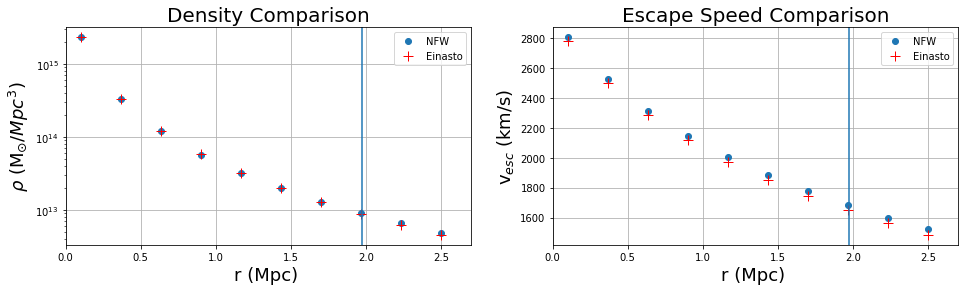

In [6]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax1.plot(r_Om02Ode08_NFW[0], rho_nfw_m200(r_Om02Ode08_NFW[0],M200_use[0],z[0],cosmo_params,cosmo_name),'o',label='NFW')
ax1.plot(r_Om02Ode08_EIN[0], rho_einasto(r_Om02Ode08_EIN[0],rho_0[0],h[0],n[0]),'+',color='r',ms=10,label='Einasto')
ax1.set_yscale('log')
ax1.set_xlim(0,2.7)
ax1.axvline(R200.value)
ax1.set_ylabel(r'$\rho$ (M$_{\odot}/Mpc^3$)',fontsize=18)
ax1.set_xlabel('r (Mpc) ', fontsize=18)
ax1.legend()
title = ax1.set_title(r'Density Comparison',fontsize=20)
title.set_y(1.0)
ax2 = fig.add_subplot(122)
ax2.grid(True)
ax2.plot(r_Om02Ode08_NFW[0], vesc_Om02Ode08_NFW[0],'o',label='NFW')
ax2.plot(r_Om02Ode08_EIN[0], vesc_Om02Ode08_EIN[0],'+',color='r',ms=10,label = 'Einasto')
ax2.axvline(R200.value)
ax2.set_xlim(0,2.7)
ax2.set_ylabel(r'v$_{esc}$ (km/s)',fontsize=18)
ax2.set_xlabel('r (Mpc) ', fontsize=18)
ax2.legend()
title = ax2.set_title(r'Escape Speed Comparison',fontsize=20)

Note the small differences in the outskirts of the density profile. Note the offset every in the escape speed profile. We quantify these differences below.

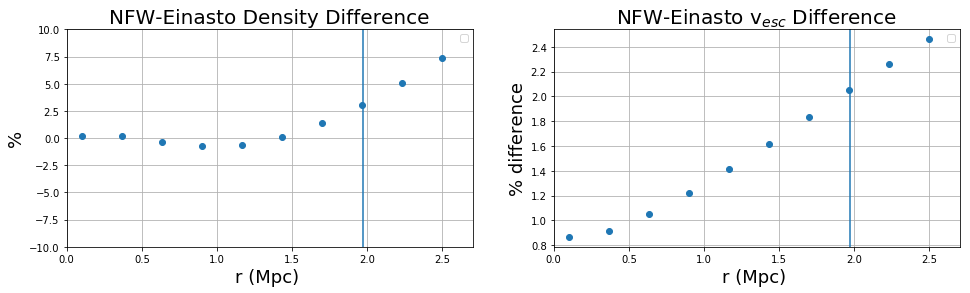

In [7]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
ax1.grid(True)
rho_nfw = rho_nfw_m200(r_Om02Ode08_NFW[0],M200_use[0],z[0],cosmo_params,cosmo_name)
rho_ein = rho_einasto(r_Om02Ode08_EIN[0],rho_0[0],h[0],n[0])
ax1.plot(r_Om02Ode08_NFW[0], 100*(rho_nfw-rho_ein)/(rho_ein),'o')
ax1.set_ylim(-10,10)
ax1.set_xlim(0,2.7)
ax1.axvline(R200.value)
ax1.set_ylabel('%',fontsize=18)
ax1.set_xlabel('r (Mpc) ', fontsize=18)
ax1.legend()
title = ax1.set_title(r'NFW-Einasto Density Difference',fontsize=20)
title.set_y(1.0)
ax2 = fig.add_subplot(122)
ax2.grid(True)
ax2.plot(r_Om02Ode08_NFW[0], 100*(vesc_Om02Ode08_NFW[0]-vesc_Om02Ode08_EIN[0])/vesc_Om02Ode08_EIN[0],'o')
ax2.axvline(R200.value)
ax2.set_xlim(0,2.7)
ax2.set_ylabel(r'% difference',fontsize=18)
ax2.set_xlabel('r (Mpc) ', fontsize=18)
ax2.legend()
title = ax2.set_title(r'NFW-Einasto v$_{esc}$ Difference',fontsize=20)

Note above that the Einasto fit to the NFW density profile is percent level (or better) accurate to about R$_{200}$ (the vertical line). However, the NFW escape speed is 1-2% higher (increasing linearly) over the profile. This is a known effect that was first discovered in [Miller et al. 2016](https://iopscience.iop.org/article/10.3847/0004-637X/822/1/41). The issue is that the NFW function does not integrate properly....basically, the density never goes to zero. When integrating the density via the Poisson equation, the escape velocity will the be over-estimated. 

In simulations, it was shown that clusters can not have NFW profiles, since the escape profiles become incorrect at the many percent level. Instead, the Einasto (or some other steep) profile is required. There are many available steeper profiles than the NFW available in the lterature and 3 were tested in Miller et al., who concluded that it is best to avoid the NFW formulism altogether.

In practice, most current data analyses still report NFW fits to density profiles. If we intend to use these density fits, we need to be able to correct for this systematic error. Fortunately, we can do so using pure analytics as shown in the above plot.

We will come back to this later. For now, we simply quantify the difference for this specific cluster.

In [8]:
escape_diff = (vesc_Om02Ode08_NFW[0]-vesc_Om02Ode08_EIN[0])/vesc_Om02Ode08_EIN[0]
r_escape_diff = r_Om02Ode08_NFW[0],
slope, intercept, r_value, p_value, std_err = linregress(r_escape_diff, escape_diff)
diff_fit = intercept + slope*r_Om02Ode08_NFW[0]
print slope, intercept

0.007004784737459541 0.006570649930632532


/usr/local/anaconda/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:126: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/anaconda/lib/python2.7/site-packages/scipy/stats/_stats_mstats_common.py:128: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


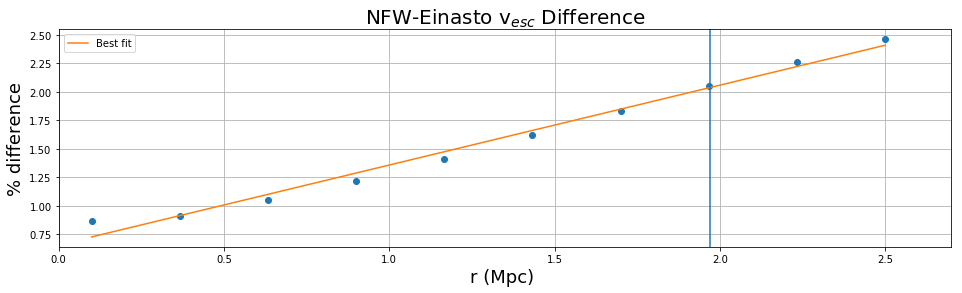

In [9]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
title = ax1.set_title(r'NFW-Einasto Density Difference',fontsize=20)
title.set_y(1.0)
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.plot(r_Om02Ode08_NFW[0], 100*(vesc_Om02Ode08_NFW[0]-vesc_Om02Ode08_EIN[0])/vesc_Om02Ode08_EIN[0],'o')
ax1.plot(r_Om02Ode08_NFW[0], 100*diff_fit, label='Best fit')
ax1.axvline(R200.value)
ax1.set_xlim(0,2.7)
ax1.set_ylabel(r'% difference',fontsize=18)
ax1.set_xlabel('r (Mpc) ', fontsize=18)
ax1.legend()
title = ax1.set_title(r'NFW-Einasto v$_{esc}$ Difference',fontsize=20)

Question Number 1, can we write a statistical inference algorithm to get back the M200s or the Einasto parameters from the density profile?

Let us first define the cluster. Since the densities span such a wide range, we are going to fit in log mass space. 

We are taking the mass profiles as known and the physical coordinates as Mpc. The M$_{200}$ is a fixed (non-cosmological) quantity as a starting point. Cosmology comes into play when calculating r$_{200}$ and the mass-concentration relation.

In [10]:
cosmo_name = 'FlatLambdaCDM' #Define a name that works with Astropy's cosmology library
cosmo = FlatLambdaCDM(H0=70, Om0=0.2,name = cosmo_name) #Call the cosmology
cosmo_params = cosmology(cosmo) #Use my function above
z = np.array((0.05)) #Define an array of redshifts
z = np.repeat(z,(1)) #Put it in the right dimensional array
M200_orig = np.repeat(5e14*u.solMass,len(z)) #Define an array of masses with units
M200_use = np.repeat(M200_orig.value,len(z)) #Put it in the right format
radial_bins = 10 #Define the number of radial bins to use
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
rho_nfw_data_r = radius_array #The density radius array

We now call a density function from the library. Notice what is required below in the call. We add some (zero-ish) errors and plot the density profile.

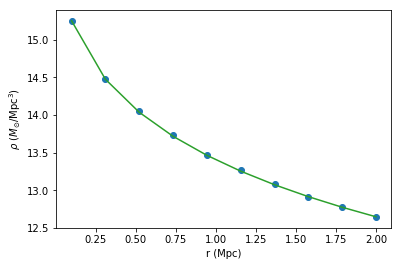

In [11]:
rho_nfw_data = rho_nfw_m200(rho_nfw_data_r,M200_use,z,cosmo_params, cosmo_name)
error = 0.01
rho_nfw_data = np.log10(rho_nfw_data) + np.random.normal(0,error,size=np.shape(rho_nfw_data)) 
rho_nfw_data_err = np.zeros(np.shape(rho_nfw_data)) + error
plt.plot(rho_nfw_data_r,rho_nfw_data,'o', label = 'NFW Data ')
plt.errorbar(rho_nfw_data_r,rho_nfw_data,yerr=rho_nfw_data_err, linestyle='None')
rho_nfw_truth = rho_nfw_m200(rho_nfw_data_r,M200_use,z,cosmo_params, cosmo_name)
plt.plot(rho_nfw_data_r,np.log10(rho_nfw_truth),'-', label = 'Truth ')
plt.xlabel('r (Mpc)')
plt.ylabel(r'$\rho$ ($M_{\odot}$/Mpc$^3$)')
#plt.yscale('log')
plt.show()

Let's do a Bayesian MCMC analysis and see if we can recover the input mass we used. 

We need a prior, a likelihood, and a sampler.

As we sample the M$_{200}$ space, we use cosmology to define r$_{200}$ and the mass-concentration relation.

First, we define the prior. In this case it is just uniform over $M_{200}$ over a wide range. Note the log$_{10}$ space.

In [12]:
def lnprior(omega):
    p_log10M200 = omega[0]
    if not(13 < p_log10M200 < 17 ):
          return -np.inf
    return 0.0

The likelihood of observing a density profile given some parameters is: $\mathcal{L}(~\rho(r)~|~\Omega~)$.

For our first test, the parameter that we wish to constrain is simply M$_{200}$. Everything else will remained fixed (like the cosmology).

In [13]:
def lnlike(omega, x, y, yerr): 
    p_radius_array = x
    p_z = z #currently a global variable)
    p_log10M200 = omega[0]
    p_cosmo_params = cosmo_params #currently a global variable
    p_cosmo_name = cosmo_name #currently a global value
    ymodel = rho_nfw_m200(p_radius_array,10**p_log10M200,p_z,p_cosmo_params,p_cosmo_name)
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-np.log10(ymodel))**2*inv_sigma2)))

The log of the prior summed with the log of the likelihoods then returns the log posterior probability:

In [14]:
def lnprob(omega, x, y, yerr):
    lp = lnprior(omega)
    ll = lnlike(omega, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(omega, x, y, yerr)

Consistent with our prior above, we define a set of starting positions for the MCMC walkers:

In [15]:
ndim, nwalkers, nsteps = 1, 100, 1000
p0 = np.transpose([np.random.uniform(13,17,size=nwalkers)])#print np.shape(p0)

We now sample from the posterior. On SURPRISE, you can use a lot of processing cores. On your own machine, you will have to confirm what is available to you. 

In [16]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(rho_nfw_data_r, rho_nfw_data, rho_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

(array([[14.70699489],
        [14.70767575],
        [14.69805436],
        [14.70964883],
        [14.70991847],
        [14.69701434],
        [14.71008413],
        [14.70800071],
        [14.70263009],
        [14.70244881],
        [14.70593848],
        [14.70395047],
        [14.70901112],
        [14.70646593],
        [14.71180693],
        [14.70441401],
        [14.71166383],
        [14.70634871],
        [14.70824506],
        [14.71123999],
        [14.70549614],
        [14.70923514],
        [14.71067297],
        [14.70940604],
        [14.70238928],
        [14.70149238],
        [14.70373761],
        [14.71217821],
        [14.71279199],
        [14.70993607],
        [14.70831724],
        [14.70402751],
        [14.71142085],
        [14.70226163],
        [14.70536858],
        [14.70662683],
        [14.70296833],
        [14.70724797],
        [14.70375021],
        [14.70611709],
        [14.70904355],
        [14.71125082],
        [14.7083728 ],
        [14

The results of the density fitting are plotted. We also calculate the median and 1$\sigma$ errors. We get the correct answer.

[[14.70536165]
 [14.70705561]
 [14.70316187]
 ...
 [14.70847566]
 [14.70847566]
 [14.70816744]]
(100, 1000, 1)


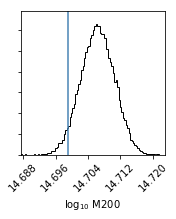

67
median(logM200) =  14.706301575922756 +/- 0.004061696738519416 0.004058144911477157
Truth:  [14.69897]


In [17]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 1))
print samples
print np.shape(sampler.chain)
fig = corner.corner((samples[:,:]), bins=100, labels=["log$_{10}$ M200"], truths = [np.log10(M200_use)]) #CORNER will plot the posteriors
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
M200_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
M200_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
M200_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
M200_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
print 'median(logM200) = ', M200_fit_50, '+/-', M200_fit_67-M200_fit_50, M200_fit_50 -M200_fit_33
sigma_M200_fit = (M200_fit_67-M200_fit_50 + M200_fit_50-M200_fit_33)/2.0
print 'Truth: ', np.log10(M200_use)

Let us also plot the resultant fit to the density.

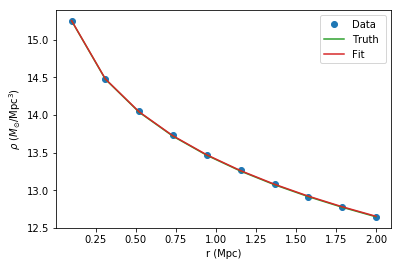

In [18]:
plt.plot(rho_nfw_data_r,rho_nfw_data,'o', label = 'Data ')
plt.errorbar(rho_nfw_data_r,rho_nfw_data,yerr=rho_nfw_data_err, linestyle='None')
plt.plot(rho_nfw_data_r,np.log10(rho_nfw_truth),'-', label = 'Truth ')
rho_nfw_fit = rho_nfw_m200(rho_nfw_data_r,10**M200_fit_50,z,cosmo_params, cosmo_name)
plt.plot(rho_nfw_data_r,np.log10(rho_nfw_fit),'-', label = 'Fit ')
plt.legend()
plt.xlabel('r (Mpc)')
plt.ylabel(r'$\rho$ ($M_{\odot}$/Mpc$^3$)')
plt.show()

We now ask the second question. Can we infer the correct M$_{200}$ from the escape profile alone? Note that we are using the M$_{200}$ escape profile generated from the M$_{200}$ density profile.

Lets start by making a dataset which is the escape profile for the same cluster as used above. Note that $v_{esc}$ is a vectorized function (unlike the $\rho$ functions). So redshift and M$_{200}$ have to be vectors (even if they only contain one cluster). Also, for v$_{esc}$, we need to specify $N_{gal}$ which is the number of galaxies in the projected phase-space.

NOTE: We do not re-set the cosmology or the cluster mass. We re-make the xdata and ydata vectors.

In [19]:
z = np.repeat(z,(1))
num_clus = len(z)
M200_use = np.repeat(M200_orig.value,len(z))
N = np.repeat(100,len(z))
radial_bins = 10
radius_array = np.linspace(0.1,2.0,radial_bins).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
vesc_nfw_data_theta = np.zeros((len(z),radial_bins))
for i in range(len(z)): #These are the escape velocity arrays in angular (not physical) units.
    vesc_nfw_data_theta[i] = radius_array /D_A(z[i], cosmo_params, cosmo.name).value 

We give it some error for the fit:

[5.e+14]


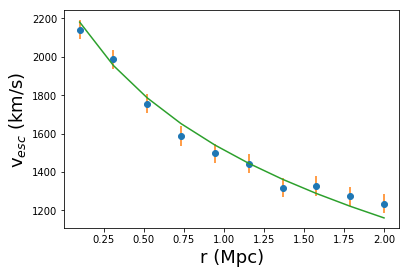

In [20]:
print M200_use
vesc_nfw_data_r,vesc_nfw_data = v_esc_NFW_M200(vesc_nfw_data_theta,z,M200_use,N,cosmo_params, cosmo_name,num_clus)
error_kms = 50
vesc_nfw_data = vesc_nfw_data  + np.random.normal(0,error_kms,size=np.shape(vesc_nfw_data)) 
vesc_nfw_data_err = np.zeros(np.shape(vesc_nfw_data)) + error_kms

for i in range(len(z)):
    plt.plot(vesc_nfw_data_r[i],vesc_nfw_data[i],'o', label = 'Data '+ str(i))
    plt.errorbar(vesc_nfw_data_r[i],vesc_nfw_data[i],yerr=vesc_nfw_data_err[i], linestyle='None')
vesc_nfw_truth_r,vesc_nfw_truth = v_esc_NFW_M200(vesc_nfw_data_theta,z,M200_use,N,cosmo_params, cosmo_name,num_clus)
for i in range(len(z)):
    plt.plot(vesc_nfw_truth_r[i],vesc_nfw_truth[i],'-', label = 'Truth '+ str(i))
plt.xlabel('r (Mpc)',fontsize=18)
plt.ylabel(r'v$_{esc}$ (km/s)',fontsize=18)
plt.show()

Make sure that we have the correct shapes for ALL of the parameters that we will use in the MCMC. Everything needs to be a NxM array, where N is the number of clusters and M is the number of radial bins (if required).

In [21]:
print np.shape(vesc_nfw_data_theta), np.shape(vesc_nfw_data_err), np.shape(vesc_nfw_data), np.shape(z), np.shape(N)

(1, 10) (1, 10) (1, 10) (1,) (1,)


As before, we define a prior, a likelihood, and a posterior. We set-up the walkers and sample. In this case, we do not transform the date to log$_{10}$ space.

In [22]:
def lnprior(omega):
    p_M200 = omega[0]
    if not(13 < p_M200 < 17 ):
          return -np.inf
    return 0.0

Note that in the Likelihood function, we define a "lambda" function which is a "sub-function" of the v_esc_NFW_M200() function from the library. Of course by choosing this specific function v_esc_NFW_M200(), it means we are only fitting for M200 in the MCMC.  

However, call requires lots of other parameters (like redshift/cosmology). We do not want the MCMC to care about those fixed parameters, and so the sub-function freezes them as fixed values. The new sub-function only takes the theta_array and M200 (a variable) as input to MCMC over.

In [23]:
def lnlike(omega, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_M200 = np.repeat(omega[0],len(p_z))
    p_N = N
    p_num_clus = num_clus
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    ymodel_fixed = lambda p_theta_array,p_M200:v_esc_NFW_M200(p_theta_array,p_z,10**p_M200,p_N,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_M200)
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [24]:
def lnprob(omega, x, y, yerr):
    lp = lnprior(omega)
    ll = lnlike(omega, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(omega, x, y, yerr)

In [32]:
ndim, nwalkers, nsteps = 1, 100, 1000
p0 = np.transpose([np.random.uniform(13,17,size=nwalkers)])#print np.shape(p0)

In [25]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(vesc_nfw_data_theta, vesc_nfw_data, vesc_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5
escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5
escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5
escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5


(array([[14.67820137],
        [14.70077494],
        [14.67552265],
        [14.67509949],
        [14.69642685],
        [14.69456696],
        [14.70745571],
        [14.69856938],
        [14.7205524 ],
        [14.69528935],
        [14.68167756],
        [14.68336519],
        [14.6938989 ],
        [14.68609521],
        [14.7109962 ],
        [14.68155062],
        [14.68389638],
        [14.70112108],
        [14.68587646],
        [14.68840083],
        [14.70098506],
        [14.69293394],
        [14.69939121],
        [14.69122787],
        [14.69872849],
        [14.69031154],
        [14.68007216],
        [14.69760897],
        [14.70611394],
        [14.69294218],
        [14.70750901],
        [14.69101139],
        [14.68267911],
        [14.68809402],
        [14.69211432],
        [14.69116456],
        [14.67700129],
        [14.69296835],
        [14.69516229],
        [14.71355289],
        [14.70392941],
        [14.71533921],
        [14.68778291],
        [14

We again look at results:

(100, 1000, 1)


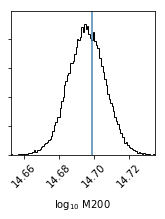

67
median(M200) =  14.695723052675596 +/- 0.010262926695716601 0.010288875974991285
median(M200/1e14) =  4.962757480681282 +/- 0.11867289495017008 0.11619097389155097
Truth:  [14.69897]


In [26]:
burn = 300
samples = sampler.chain[:, burn:, :].reshape((-1, 1))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], bins=100, labels=["log$_{10}$ M200"], truths = [np.log10(M200_use)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
M200_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
M200_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
M200_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
M200_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
print 'median(M200) = ', M200_fit_50, '+/-', M200_fit_67-M200_fit_50, M200_fit_50-M200_fit_33
print 'median(M200/1e14) = ', 10**(M200_fit_50)/1e14, '+/-', 10**(M200_fit_67)/1e14-10**(M200_fit_50)/1e14, 10**(M200_fit_50)/1e14 -10**(M200_fit_33)/1e14
sigma_M200_fit = (M200_fit_67-M200_fit_50 + M200_fit_50-M200_fit_33)/2.0
print 'Truth: ', np.log10(M200_use)

Let us also plot the resultant fit to the escape profile.

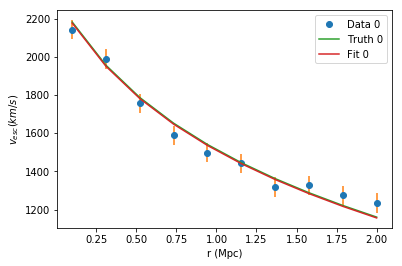

In [28]:
M200_fitted_50 = np.repeat(M200_fit_50,len(z))
for i in range(len(z)):
    plt.plot(vesc_nfw_data_r[i],vesc_nfw_data[i],'o', label = 'Data '+ str(i))
    plt.errorbar(vesc_nfw_data_r[i],vesc_nfw_data[i],yerr=vesc_nfw_data_err[i], linestyle='None')
for i in range(len(z)):
    plt.plot(vesc_nfw_truth_r[i],vesc_nfw_truth[i],'-', label = 'Truth '+ str(i))
vesc_nfw_fit_r,vesc_nfw_fit = v_esc_NFW_M200(vesc_nfw_data_theta,z,10**M200_fitted_50,N,cosmo_params, cosmo_name,num_clus)
for i in range(len(z)):
    plt.plot(vesc_nfw_fit_r[i],vesc_nfw_fit[i],'-', label = 'Fit '+ str(i))
plt.legend()
plt.xlabel('r (Mpc)')
plt.ylabel(r'$v_{esc} (km/s)$')
plt.show()

Lets relax the NFW constraint and drop the mass - concentration relation component. 

In this situation, there are 2 parameters to describe an NFW profile, $\rho_s$ and $r_s$. Even though we originally defined our cluster using M$_{200}$ and a mass-concentration, we treat that as "data" and we drop that information entirely and fit blindly to $\rho_s$ and $r_s$.

The called function for the density profile is:  rhos_nfw(). The only required inputs are the radius array and the 2 parameters of the NFW (as variables).

In [29]:
def lnprior(omega):
    p_rho_s = omega[0]
    p_r_s = omega[1]
    if not((13 < p_rho_s < 17) & (0.2 < p_r_s < 1)):
          return -np.inf
    return 0.0

In [30]:
def lnlike(omega, x, y, yerr): 
    p_radius_array = x
    p_z = z
    p_rho_s= np.repeat(omega[0],(1))
    p_r_s = np.repeat(omega[1],(1))
    p_N = N
    p_num_clus = num_clus
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    ymodel = rhos_nfw(p_radius_array, 10**p_rho_s, p_r_s)
#    print model
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-np.log10(ymodel))**2*inv_sigma2)))

In [31]:
def lnprob(omega, x, y, yerr):
    lp = lnprior(omega)
    ll = lnlike(omega, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(omega, x, y, yerr)

In [32]:
ndim, nwalkers, nsteps = 2, 25, 500
p0 = np.transpose([np.random.uniform(13,17,size=nwalkers), np.random.uniform(0.2,1,size=nwalkers)])

In [33]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(rho_nfw_data_r, rho_nfw_data, rho_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


(array([[14.76395464,  0.45339241],
        [14.76191114,  0.45465823],
        [14.77180235,  0.44968842],
        [14.77303953,  0.44892041],
        [14.77684171,  0.44943122],
        [14.75396183,  0.45737186],
        [14.76641442,  0.45350292],
        [14.77185174,  0.45169914],
        [14.76694296,  0.45182275],
        [14.78653921,  0.44512156],
        [14.78961973,  0.44527367],
        [14.75624421,  0.45835451],
        [14.78210035,  0.4493734 ],
        [14.76647085,  0.45307641],
        [14.77650219,  0.44927295],
        [14.78711596,  0.44466133],
        [14.75653643,  0.45610778],
        [14.79262368,  0.44184638],
        [14.76476909,  0.45502607],
        [14.76660557,  0.45456636],
        [14.76107798,  0.45524577],
        [14.76225809,  0.45459612],
        [14.77960062,  0.44795156],
        [14.75767529,  0.45862141],
        [14.75490546,  0.45927131],
        [14.77325703,  0.44923883],
        [14.78027416,  0.44799733],
        [14.7547299 ,  0.456

We next plot the posteriors, which is in 2 dimensions this time.

592689872554414.6 0.4480809462339606 [0.05]
(50, 1000, 2)


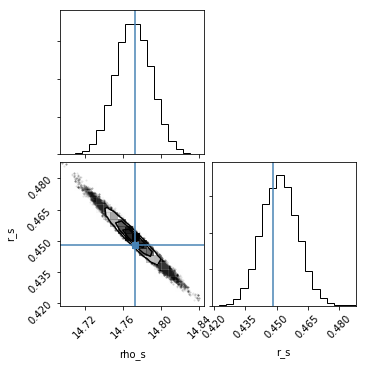

median(rho_s) =  14.770773357996099 +/- 0.018495771888844104 0.018234942434148138
median(log rho_s) =  1.1694032343991256 +/- 0.0005434777518620315 0.000536480185201027
Truth:  14.772827506399958
median(r_s) =  0.4514702915309806 +/- 0.008484204308666532 0.008390571204370145
Truth:  0.4480809462339606


In [34]:
M200_true,R200_true,conc_true,rho_s_true, sigma_rho_s_true,r_s_true, sigma_r_s_true =  nfws_errors(M200_orig[0], 0.2, z[0],cosmo_params, cosmo.name)
print rho_s_true, r_s_true, z
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 2))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["rho_s", "r_s"], truths = [np.log10(rho_s_true), r_s_true])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
rho_s_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
rho_s_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
rho_s_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
rho_s_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
r_s_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
r_s_fit_50 =  np.percentile(sampler.chain[:,burn:,1],50)
r_s_fit_33 =  np.percentile(sampler.chain[:,burn:,1],33-16.5)
r_s_fit_67 =  np.percentile(sampler.chain[:,burn:,1],67+16.5)
print 'median(rho_s) = ', rho_s_fit_50, '+/-', rho_s_fit_67-rho_s_fit_50, rho_s_fit_50-rho_s_fit_33
print 'median(log rho_s) = ', np.log10(rho_s_fit_50), '+/-', np.log10(rho_s_fit_67)-np.log10(rho_s_fit_50), np.log10(rho_s_fit_50) -np.log10(rho_s_fit_33)
sigma_rho_s_fit = (rho_s_fit_67-rho_s_fit_50 + rho_s_fit_50-rho_s_fit_33)/2.0
print 'Truth: ', np.log10(rho_s_true)
print 'median(r_s) = ', r_s_fit_50, '+/-', r_s_fit_67-r_s_fit_50, r_s_fit_50-r_s_fit_33
sigma_rho_s_fit = (r_s_fit_67-r_s_fit_50 + r_s_fit_50-r_s_fit_33)/2.0
print 'Truth: ',r_s_true

Note the elongated-shaped dependency between the two parameters. This makes it impossible to constrain either one accurately. However, the mass can still be well constrained. 

We can now sample from this posterior and measure the inferred $M_{200}$ (i.e., the mass within a radius giving a density that is $200\times \rho_{crit}$.

In [35]:
burn = 200
len_r = len(rho_nfw_data_r)
len_r_interp = 1000
rho_crit = cosmo.critical_density(z[0])
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
rho_s_fitted = sampler.chain[:,burn:,0].flatten()
r_s_fitted = sampler.chain[:,burn:,1].flatten()
rand_vec = np.random.uniform(1,len(r_s_fitted),size=1000).astype(int)
r_denfit = np.linspace(np.min(rho_nfw_data_r),np.max(rho_nfw_data_r),len_r).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
r_interp = np.linspace(np.min(rho_nfw_data_r),np.max(rho_nfw_data_r),len_r_interp).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.     
M200_fitted = []
R200_fitted = []
for i in range(len(rand_vec)):
        rho_r = []
        for j in range(len_r):
            rho_r = np.append(rho_r,4*np.pi*integrate.quad(rhos_nfw_int,0,r_denfit[j],args=(10**rho_s_fitted[rand_vec[i]],r_s_fitted[rand_vec[i]]))[0]/(4/3.*np.pi*(r_denfit[j]**3.0)))
        log10_rho_r_func = interp1d(rho_nfw_data_r, np.log10(rho_r), kind='quadratic')
        log10_rho_r_interp = log10_rho_r_func(r_interp)
        w = np.where(log10_rho_r_interp < np.log10(200*rho_crit.value))[0]
        if (len(w) >0):
            R200_fitted = np.append(R200_fitted,r_interp[w[0]])
            M200_fitted = np.append(M200_fitted, 4*np.pi*integrate.quad(rhos_nfw_int,0,r_interp[w[0]],args=(10**rho_s_fitted[rand_vec[i]],r_s_fitted[rand_vec[i]]))[0])
M200_fitted_50 =  np.percentile(M200_fitted,50)
M200_fitted_33 =  np.percentile(M200_fitted,33-16.5)
M200_fitted_67 =  np.percentile(M200_fitted,67+16.5)
R200_fitted_50 =  np.percentile(R200_fitted,50)
R200_fitted_33 =  np.percentile(R200_fitted,33-16.5)
R200_fitted_67 =  np.percentile(R200_fitted,67+16.5)
print 'median(M200_fitted) = ', M200_fitted_50, '+/-', M200_fitted_67-M200_fitted_50, M200_fitted_50-M200_fitted_33
print 'median(logM200_fitted) = ', np.log10(M200_fitted_50), '+/-', np.log10(M200_fitted_67)-np.log10(M200_fitted_50), np.log10(M200_fitted_50) -np.log10(M200_fitted_33)
sigma_logM200_fitted = (np.log10(M200_fitted_67)-np.log10(M200_fitted_50) + np.log10(M200_fitted_50)-np.log10(M200_fitted_33))/2.0
print 'median(R200_fitted) = ', R200_fitted_50, '+/-', R200_fitted_67-R200_fitted_50, R200_fitted_50-R200_fitted_33
print 'M200 Truth: ', np.log10(M200_true.value), z
print 'R200 Truth: ', R200_true.value

median(M200_fitted) =  508613247622411.25 +/- 4728058498601.6875 5619056066542.625
median(logM200_fitted) =  14.706387667861678 +/- 0.004018543406042241 0.004824697894814989
median(R200_fitted) =  1.631 +/- 0.0040000000000000036 0.006000000000000005
M200 Truth:  14.698970004336019 [0.05]
R200 Truth:  1.62038576164


We plot the comparison:

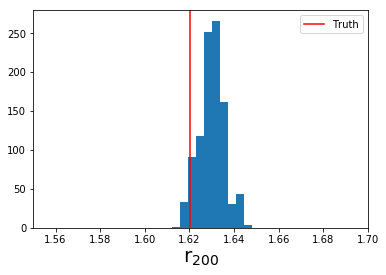

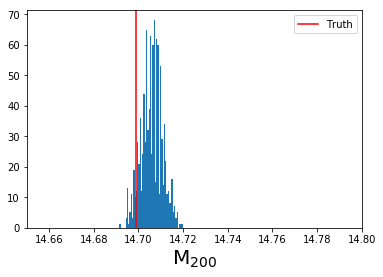

In [36]:
plt.hist(R200_fitted,bins=10)
plt.axvline(R200_true.value, color='r', label='Truth')
plt.xlim(1.55,1.7)
plt.xlabel('r$_{200}$',fontsize=20)
plt.legend()
plt.show()
plt.hist(np.log10(M200_fitted),bins=50)
plt.axvline(np.log10(M200_true.value), color='r', label = 'Truth')
plt.xlim(14.65,14.8)
plt.xlabel('M$_{200}$',fontsize=20)
plt.legend()
plt.show()

Now, let's use the NFW generated density profile and escape, but fit to an Einasto model.

So we know how well we are doing, we determine the Einasto profiles from from the function we used aboce to match the NFW/Einasto density profiles.

Again, we are not changing comology, the cluster M$_{200}$ or the redshift.

While we are at it, let us look at the escape profile differences for this cluster, which is half the mass that we examined earlier.

Example NFW M200, R200, and c:  [5.e+14] solMass 1.62038576164 Mpc 3.9117606599101657
Example Einasto rho_0, h, and n parameters:  [[3.58027486e+17]] [[0.00014606]] [[3.91176066]]


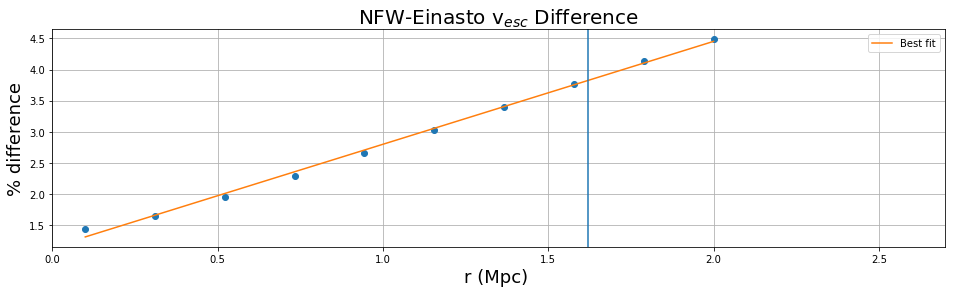

In [37]:
rho_0, h, n, = [],[],[] #These are the new EInasto paramaters.
for i in range(len(z)): #This will call the einasto_nfwM200_errors() function. Given an NFW M200, we can get appropriate Einasto params.
    M200,R200,conc,a,b,c, simga_a, sigma_b, sigma_c =  einasto_nfwM200_errors(M200_orig, 0.001, z,cosmo_params, cosmo_name)
    rho_0 = np.append(rho_0,a)
    h = np.append(h, b)
    n = np.append(n,c)
print 'Example NFW M200, R200, and c: ', M200, R200[0], c
rho_0 = np.resize(rho_0,(1,len(z)))
h = np.resize(h,(1,len(z)))
n = np.resize(n, (1,len(z)))
print 'Example Einasto rho_0, h, and n parameters: ',rho_0, h,n

#Given the cluster mass profile already defined above, generate an Einasto escape velocity profile:
r_Om02Ode08_EIN,vesc_Om02Ode08_EIN = v_esc_einasto(vesc_nfw_data_theta,z,rho_0,h,n,N,cosmo_params, cosmo_name,num_clus)
#And an NFW escape velocity profile
r_Om02Ode08_NFW,vesc_Om02Ode08_NFW = v_esc_NFW_M200(vesc_nfw_data_theta,z,M200_use,N,cosmo_params, cosmo_name, num_clus)
escape_diff = (vesc_Om02Ode08_NFW[0]-vesc_Om02Ode08_EIN[0])/vesc_Om02Ode08_EIN[0]
r_escape_diff = r_Om02Ode08_NFW[0],
slope, intercept, r_value, p_value, std_err = linregress(r_escape_diff, escape_diff)
diff_fit = intercept + slope*r_Om02Ode08_NFW[0]

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
title = ax1.set_title(r'NFW-Einasto Density Difference',fontsize=20)
title.set_y(1.0)
ax1 = fig.add_subplot(111)
ax1.grid(True)
ax1.plot(r_Om02Ode08_NFW[0], 100*(vesc_Om02Ode08_NFW[0]-vesc_Om02Ode08_EIN[0])/vesc_Om02Ode08_EIN[0],'o')
ax1.plot(r_Om02Ode08_NFW[0], 100*diff_fit, label='Best fit')
ax1.axvline(R200.value)
ax1.set_xlim(0,2.7)
ax1.set_ylabel(r'% difference',fontsize=18)
ax1.set_xlabel('r (Mpc) ', fontsize=18)
ax1.legend()
title = ax1.set_title(r'NFW-Einasto v$_{esc}$ Difference',fontsize=20)

Note that the differences are larger for lower mass systems. This is the first evidence of a mass dependent correction term. We will consider this later. 

We can also test how well we can recover Einasto masses ($M_{200})$ from the density and escape profiles. 

We will use a set of Einasto parameters that match the cluster we studied above. Recall that these parameters stem from an initial NFW density profile given an M$_{200}$, a mass-concentration relation, and a cosmology. From those input parameters we create a (cosmology-free) mass profile. We then fit that mass profile to an Einasto function to give us the following parameters. The fact that we did all this does not introduce any biases in our analyses (since mass profiles are independent of cosmology). We chose to do this in order to compare apples-to-apples in the cluster mass profile between NFW and EINASTO.

In [38]:
print 'Example Einasto rho_0, h, and n parameters for the NFW cluster used above: ',np.log10(rho_0), np.log10(h),n
print 'M200 original: ',M200_orig

Example Einasto rho_0, h, and n parameters for the NFW cluster used above:  [[17.55391637]] [[-3.83547094]] [[3.91176066]]
M200 original:  [5.e+14] solMass


Let's compare the NFW to the Einasto density profiles.

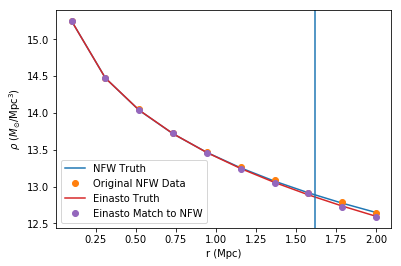

In [39]:
rho_ein_data_r = rho_nfw_data_r
rho_ein_data = rho_einasto(rho_ein_data_r,rho_0, h,n)[0]
rho_ein_truth = rho_ein_data
rho_ein_truth_r = rho_ein_data_r
error = 0.01
rho_ein_data = np.log10(rho_ein_data) + np.random.normal(0,error,size=np.shape(rho_ein_data)) 
rho_ein_data_err = np.zeros(np.shape(rho_ein_data)) + error
rho_nfw_truth = rho_nfw_m200(rho_nfw_data_r,M200_use,z,cosmo_params, cosmo_name)
plt.plot(rho_nfw_data_r,np.log10(rho_nfw_truth),'-', label = 'NFW Truth ')
plt.plot(rho_nfw_data_r,rho_nfw_data,'o', label = 'Original NFW Data ')
plt.errorbar(rho_ein_data_r,rho_ein_data,yerr=rho_ein_data_err, linestyle='None')
plt.plot(rho_ein_truth_r,np.log10(rho_ein_truth),'-', label = 'Einasto Truth ')
plt.plot(rho_ein_data_r,rho_ein_data,'o', label = 'Einasto Match to NFW')
plt.legend()
plt.xlabel('r (Mpc)')
plt.ylabel(r'$\rho$ ($M_{\odot}$/Mpc$^3$)')
plt.axvline(R200.value)
#plt.yscale('log')
plt.show()

Note that the Einasto density profile is a little steeper near the virial radius. But it is a very small effect.

We do not expect to have systematic issues when fitting Einasto density profiles to data generated from an NFW. But let's look. We now fit to the Einasto density rho_einasto(). Like rho_nfws(), this function only takes an input radius array (physical coordinates) and the three Einasto parameters (as variables).

In [40]:
def lnprior(omega):
    o_rho_0 = omega[0]
    o_h = omega[1]
    o_n = omega[2]
    if not((15.5 < o_rho_0 < 19) & (-10.0 < o_h < -1.0) & (1.0 < o_n < 10.0)):
          return -np.inf
    return 0.0

In [41]:
def lnlike(omega, x, y, yerr): 
    p_radius_array = x
    p_rho_0 = 10**omega[0]
    p_h = 10**omega[1]
    p_n = omega[2]
    ymodel = rho_einasto(p_radius_array,p_rho_0, p_h, p_n)
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-np.log10(ymodel))**2*inv_sigma2)))

In [42]:
def lnprob(omega, x, y, yerr):
    lp = lnprior(omega)
    ll = lnlike(omega, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(omega, x, y, yerr)

In [49]:
ndim, nwalkers, nsteps = 3, 40, 1000
p0 = np.transpose([np.random.uniform(15.5,19,size=nwalkers), np.random.uniform(-10.0,0.,size=nwalkers), np.random.uniform(1,10,size=nwalkers)])

We will sample the Einasto density posterior against data generated originally for the NFW density profile (and small errors).

In [50]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(rho_nfw_data_r, rho_nfw_data, rho_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
escape_functions_noastropy.py:841: RuntimeWarning: overflow encountered in power
  return rho_0*np.exp(-(r/h)**(1./n))
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/usr/local/anaconda/lib/python2.7/site-packages/emcee/ensemble.py:336: Runtim

(array([[17.85128819, -4.35296827,  4.31402597],
        [17.82091991, -4.27590352,  4.24946378],
        [15.65800554, -6.27554648,  9.26639808],
        [17.95312053, -4.50648758,  4.4212513 ],
        [17.70530531, -4.13710761,  4.16177642],
        [17.86366949, -4.34846996,  4.3031539 ],
        [17.49522665, -3.76506329,  3.8719141 ],
        [17.54382988, -3.87841406,  3.96886625],
        [17.67772645, -4.10145128,  4.13674477],
        [17.7678911 , -4.25505988,  4.25122833],
        [17.96884567, -4.52391059,  4.43116146],
        [17.74014716, -4.15979237,  4.16823581],
        [17.82171044, -4.27570094,  4.25066538],
        [17.72838788, -4.14895175,  4.16503704],
        [17.65816853, -4.06069097,  4.10392216],
        [18.08060524, -4.72240986,  4.58117626],
        [17.85725175, -4.36702087,  4.32518503],
        [17.58503555, -3.94941125,  4.02281096],
        [17.78809217, -4.25527811,  4.24422531],
        [17.71726885, -4.14060689,  4.15980825],
        [17.707885  

As with the NFW, lets compare the fitted to the original parameters.

(40, 1000, 3)


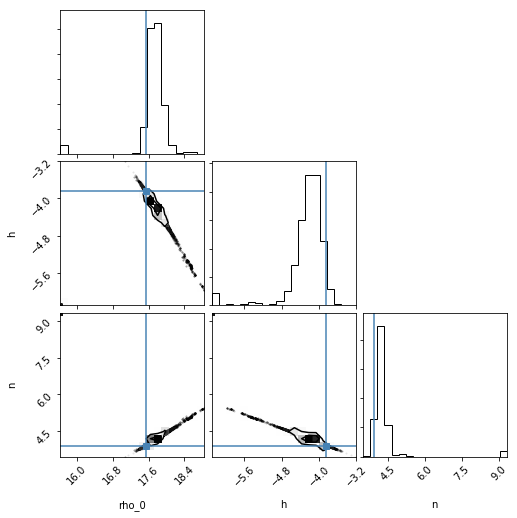

median(rho_s) =  17.737846982565564 +/- 0.15571511523895865 0.13321920832624556
median(log rho_s) =  1.2489009040900338 +/- 0.0037959007271186618 0.0032740571492024806
Truth:  [[17.55391637]]
median(r_s) =  -4.184627161721117 +/- 0.19896088222768382 0.2575334263930591
Truth:  [[-3.83547094]]
median(r_s) =  4.192072205416379 +/- 0.18379443996527023 0.14589018846807633
Truth:  [[3.91176066]]


In [52]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 3))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["rho_0", "h", "n"], truths = [np.log10(rho_0), np.log10(h),n])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
rho_0_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
rho_0_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
rho_0_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
rho_0_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
h_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
h_fit_50 =  np.percentile(sampler.chain[:,burn:,1],50)
h_fit_33 =  np.percentile(sampler.chain[:,burn:,1],33-16.5)
h_fit_67 =  np.percentile(sampler.chain[:,burn:,1],67+16.5)
n_fit =  np.percentile(sampler.chain[:,burn:,2],percentile_array)
n_fit_50 =  np.percentile(sampler.chain[:,burn:,2],50)
n_fit_33 =  np.percentile(sampler.chain[:,burn:,2],33-16.5)
n_fit_67 =  np.percentile(sampler.chain[:,burn:,2],67+16.5)
print 'median(rho_s) = ', rho_0_fit_50, '+/-', rho_0_fit_67-rho_0_fit_50, rho_0_fit_50-rho_0_fit_33
print 'median(log rho_s) = ', np.log10(rho_0_fit_50), '+/-', np.log10(rho_0_fit_67)-np.log10(rho_0_fit_50), np.log10(rho_0_fit_50) -np.log10(rho_0_fit_33)
sigma_rho_s_fit = (rho_0_fit_67-rho_0_fit_50 + rho_0_fit_50-rho_0_fit_33)/2.0
print 'Truth: ', np.log10(rho_0)
print 'median(r_s) = ', h_fit_50, '+/-', h_fit_67-h_fit_50, h_fit_50-h_fit_33
sigma_rho_s_fit = (h_fit_67-h_fit_50 + h_fit_50-h_fit_33)/2.0
print 'Truth: ', np.log10(h)
print 'median(r_s) = ', n_fit_50, '+/-', n_fit_67-n_fit_50, n_fit_50-n_fit_33
sigma_rho_s_fit = (n_fit_67-n_fit_50 + n_fit_50-n_fit_33)/2.0
print 'Truth: ',n

Similar to the NFW profile when we drop the mass-concentration relation, the three Einasto parameters are highly correlated. 

Therefore, like with the NFW rho_s, r_s case,  we sample these posteriors to measure a grid of M$_{200}$ to compare to our original choice of log$_{10}$ M$_{200} = 14.5$.

In [53]:
burn = 100
len_r = len(rho_ein_data_r)
len_r_interp = 1000
rho_crit = cosmo.critical_density(z[0])
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
rho_0_fitted = sampler.chain[:,burn:,0].flatten()
h_fitted = sampler.chain[:,burn:,1].flatten()
n_fitted = sampler.chain[:,burn:,2].flatten()
rand_vec = np.random.uniform(1,len(rho_0_fitted),size=5000).astype(int)
r_denfit = np.linspace(np.min(rho_ein_data_r),np.max(rho_ein_data_r),len_r).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
r_interp = np.linspace(np.min(rho_ein_data_r),np.max(rho_ein_data_r),len_r_interp).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.     
M200_fitted = []
R200_fitted = []
for i in range(len(rand_vec)):
        rho_r = []
        for j in range(len_r):
            rho_r = np.append(rho_r,4*np.pi*integrate.quad(rho_einasto_int,0,r_denfit[j],args=(10**rho_0_fitted[rand_vec[i]],10**h_fitted[rand_vec[i]], n_fitted[rand_vec[i]]))[0]/(4/3.*np.pi*(r_denfit[j]**3.0)))
        log10_rho_r_func = interp1d(rho_ein_data_r, np.log10(rho_r), kind='quadratic')
        log10_rho_r_interp = log10_rho_r_func(r_interp)
        w = np.where(log10_rho_r_interp < np.log10(200*rho_crit.value))[0]
        if (len(w) >0):
            R200_fitted = np.append(R200_fitted,r_interp[w[0]])
            M200_fitted = np.append(M200_fitted, 4*np.pi*integrate.quad(rho_einasto_int,0,r_interp[w[0]],args=(10**rho_0_fitted[rand_vec[i]],10**h_fitted[rand_vec[i]],n_fitted[rand_vec[i]]))[0])
M200_fitted_50 =  np.percentile(M200_fitted,50)
M200_fitted_33 =  np.percentile(M200_fitted,33-16.5)
M200_fitted_67 =  np.percentile(M200_fitted,67+16.5)
R200_fitted_50 =  np.percentile(R200_fitted,50)
R200_fitted_33 =  np.percentile(R200_fitted,33-16.5)
R200_fitted_67 =  np.percentile(R200_fitted,67+16.5)
print 'median(M200_fitted) = ', M200_fitted_50, '+/-', M200_fitted_67-M200_fitted_50, M200_fitted_50-M200_fitted_33
print 'median(logM200_fitted) = ', np.log10(M200_fitted_50), '+/-', np.log10(M200_fitted_67)-np.log10(M200_fitted_50), np.log10(M200_fitted_50) -np.log10(M200_fitted_33)
sigma_logM200_fitted = (np.log10(M200_fitted_67)-np.log10(M200_fitted_50) + np.log10(M200_fitted_50)-np.log10(M200_fitted_33))/2.0
print 'median(R200_fitted) = ', R200_fitted_50, '+/-', R200_fitted_67-R200_fitted_50, R200_fitted_50-R200_fitted_33

print 'M200 Truth: ', np.log10(M200_true.value), z
print 'R200 Truth: ', R200_true.value

median(M200_fitted) =  512788848689758.5 +/- 5961249909698.5625 5600671236711.75
median(logM200_fitted) =  14.709938572272925 +/- 0.005019619994108382 0.004769450677532205
median(R200_fitted) =  1.635 +/- 0.006000000000000005 0.006000000000000005
M200 Truth:  14.698970004336019 [0.05]
R200 Truth:  1.62038576164


Lets now compare visually:

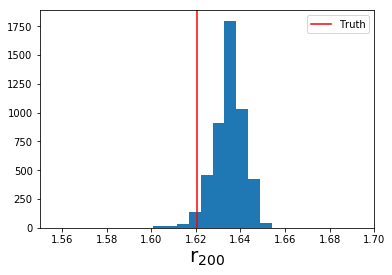

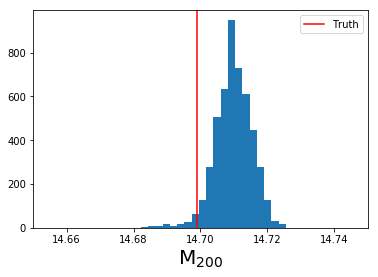

In [54]:
plt.hist(R200_fitted,bins=10)
plt.axvline(R200_true.value, color='r', label='Truth')
plt.xlim(1.55,1.7)
plt.xlabel('r$_{200}$',fontsize=20)
plt.legend()
plt.show()
plt.hist(np.log10(M200_fitted),bins=20)
plt.axvline(np.log10(M200_true.value), color='r', label = 'Truth')
plt.xlim(14.65,14.75)
plt.xlabel('M$_{200}$',fontsize=20)
plt.legend()
plt.show()

As with the NFW, we can achieve high precision of the inferred M$_{200} $ using the Einasto density formula (on the NFW density shape).

Now lets look at fitting the NFW potential profile with an Einasto form.

In [55]:
print 'Example Einasto rho_0, h, and n parameters: ',np.log10(rho_0), np.log10(h),n

Example Einasto rho_0, h, and n parameters:  [[17.55391637]] [[-3.83547094]] [[3.91176066]]


Recall from earlier that we saw differences between the escape profiles of the NFW versis the Einasto? Lets examine more closely:

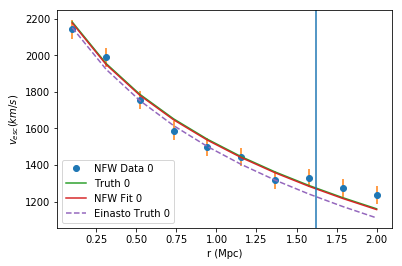

In [56]:
for i in range(len(z)):
    plt.plot(vesc_nfw_data_r[i],vesc_nfw_data[i],'o', label = 'NFW Data '+ str(i))
    plt.errorbar(vesc_nfw_data_r[i],vesc_nfw_data[i],yerr=vesc_nfw_data_err[i], linestyle='None')
for i in range(len(z)):
    plt.plot(vesc_nfw_truth_r[i],vesc_nfw_truth[i],'-', label = 'Truth '+ str(i))
for i in range(len(z)):
    plt.plot(vesc_nfw_fit_r[i],vesc_nfw_fit[i],'-', label = 'NFW Fit '+ str(i))
vesc_ein_truth_r, vesc_ein_truth = v_esc_einasto(vesc_nfw_data_theta,z,rho_0,h,n,N,cosmo_params, cosmo_name,num_clus)
for i in range(len(z)):
    plt.plot(vesc_ein_truth_r[i],vesc_ein_truth[i],'--', label = 'Einasto Truth '+ str(i))
plt.legend()
plt.xlabel('r (Mpc)')
plt.ylabel(r'$v_{esc} (km/s)$')
plt.axvline(R200.value)
plt.show()

Notice that the Einasto profile is lower than the NFW escape profile for a fixed NFW density profile. This might be a larger and more noticeable effect than what we saw for the density. Let's check. We will use the v_esc_einasto() function. As before with the v_esc_NFW_M200(), I will use a sub-function to freeze certain parameters out of the MCMC.

In [57]:
def lnprior(omega):
    o_rho_0 = omega[0]
    o_h = omega[1]
    o_n = omega[2]
    if not((15.5 < o_rho_0 < 19) & (-10.0 < o_h < -1.0) & (1.0 < o_n < 10.0)):
          return -np.inf
    return 0.0

In [58]:
def lnlike(omega, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_rho_0 = np.repeat(omega[0],(1))
    p_h = np.repeat(omega[1],(1))
    p_n = np.repeat(omega[2],(1))
    p_N = N
    p_num_clus = num_clus
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    ymodel_fixed = lambda p_theta_array,p_rho_0,p_h,p_n:v_esc_einasto(p_theta_array,p_z,10**p_rho_0,10**p_h,p_n,p_N,p_cosmo_params, p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_rho_0,p_h,p_n)
    inv_sigma2 = 1.0/(yerr**2)
    if (np.isnan(np.sum(ymodel))):
        return -np.inf
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [59]:
def lnprob(omega, x, y, yerr):
    lp = lnprior(omega)
    ll = lnlike(omega, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(omega, x, y, yerr)

In [60]:
ndim, nwalkers, nsteps = 3, 40, 1000
p0 = np.transpose([np.random.uniform(15.5,19,size=nwalkers), np.random.uniform(-10.0,-1.,size=nwalkers), np.random.uniform(1,10,size=nwalkers)])

In [61]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(vesc_nfw_data_theta, vesc_nfw_data, vesc_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
/usr/local/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:640: RuntimeWarning: invalid value encountered in power
  *arrays,

(array([[18.80854112, -6.38469013,  5.82124991],
        [18.1845123 , -5.16962608,  4.96208418],
        [18.49056044, -5.73645835,  5.36102614],
        [18.01324308, -4.88346326,  4.76243058],
        [18.22916077, -5.13586247,  4.9135505 ],
        [18.76037464, -9.00746388,  8.39082202],
        [18.07249806, -4.76871345,  4.6190823 ],
        [18.9071005 , -6.88197736,  6.22767939],
        [18.77000988, -5.98565824,  5.4800864 ],
        [17.55271899, -3.99286655,  4.08065532],
        [18.62057185, -5.89166666,  5.45402827],
        [16.97439441, -3.30685128,  3.62522158],
        [16.75632515, -3.09031358,  3.50360707],
        [16.79675582, -4.6999747 ,  1.37062708],
        [16.6760538 , -2.89841209,  3.33155391],
        [18.433928  , -5.29764939,  4.98213621],
        [16.57326169, -2.66414198,  3.11812971],
        [18.26636073, -5.17290171,  4.92959601],
        [18.6196203 , -5.93765995,  5.49811395],
        [18.14472428, -5.05564258,  4.86970417],
        [17.96195577

(40, 1000, 3)


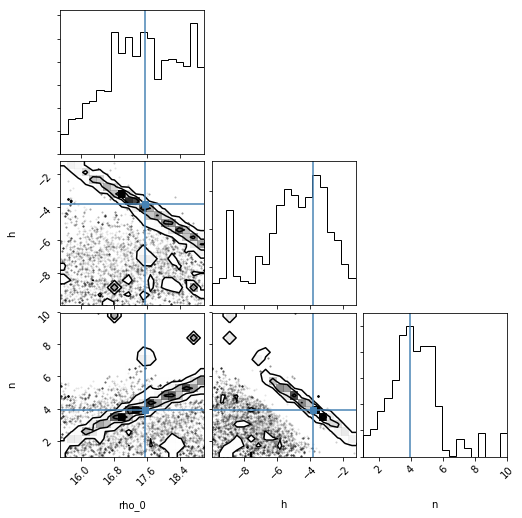

median(rho_0) =  17.54717385290076 +/- 0.9812537442704858 0.9736552997108419
median(log rho_0) =  1.244207178982707 +/- 0.023631385784254944 0.024792460182148757
Truth:  [[17.55391637]]
median(h) =  -4.845940753549714 +/- 1.7907599217825547 2.416436631970644
Truth:  [[-3.83547094]]
median(n) =  4.094617935940953 +/- 1.2762768224060883 1.284641414743493
Truth:  [[3.91176066]]


In [63]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 3))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["rho_0", "h", "n"], truths = [np.log10(rho_0), np.log10(h),n])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
rho_0_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
rho_0_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
rho_0_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
rho_0_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
h_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
h_fit_50 =  np.percentile(sampler.chain[:,burn:,1],50)
h_fit_33 =  np.percentile(sampler.chain[:,burn:,1],33-16.5)
h_fit_67 =  np.percentile(sampler.chain[:,burn:,1],67+16.5)
n_fit =  np.percentile(sampler.chain[:,burn:,2],percentile_array)
n_fit_50 =  np.percentile(sampler.chain[:,burn:,2],50)
n_fit_33 =  np.percentile(sampler.chain[:,burn:,2],33-16.5)
n_fit_67 =  np.percentile(sampler.chain[:,burn:,2],67+16.5)
print 'median(rho_0) = ', rho_0_fit_50, '+/-', rho_0_fit_67-rho_0_fit_50, rho_0_fit_50-rho_0_fit_33
print 'median(log rho_0) = ', np.log10(rho_0_fit_50), '+/-', np.log10(rho_0_fit_67)-np.log10(rho_0_fit_50), np.log10(rho_0_fit_50) -np.log10(rho_0_fit_33)
sigma_rho_0_fit = (rho_0_fit_67-rho_0_fit_50 + rho_0_fit_50-rho_0_fit_33)/2.0
print 'Truth: ', np.log10(rho_0)
print 'median(h) = ', h_fit_50, '+/-', h_fit_67-h_fit_50, h_fit_50-h_fit_33
sigma_rho_s_fit = (h_fit_67-h_fit_50 + h_fit_50-h_fit_33)/2.0
print 'Truth: ', np.log10(h)
print 'median(n) = ', n_fit_50, '+/-', n_fit_67-n_fit_50, n_fit_50-n_fit_33
sigma_rho_s_fit = (n_fit_67-n_fit_50 + n_fit_50-n_fit_33)/2.0
print 'Truth: ',n

The Einasto-sampled escape profiles is the nastiest looking posterior yet. Note that we had to add a catch to likelihood to ensure that NaNs where not counted in the MCMC.

Like the fact that the Einasto density parameter degeneracies were worse than NFW parameter degeneracies in the density profiles, the effect is worse for the escape profiles.

In [64]:
burn = 100
len_r = len(rho_ein_data_r)
len_r_interp = 1000
rho_crit = cosmo.critical_density(z[0])
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
rho_0_fitted = sampler.chain[:,burn:,0].flatten()
h_fitted = sampler.chain[:,burn:,1].flatten()
n_fitted = sampler.chain[:,burn:,2].flatten()
rand_vec = np.random.uniform(1,len(rho_0_fitted),size=5000).astype(int)
r_denfit = np.linspace(np.min(rho_ein_data_r),np.max(rho_ein_data_r),len_r).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
r_interp = np.linspace(np.min(rho_ein_data_r),np.max(rho_ein_data_r),len_r_interp).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.     
M200_fitted = []
R200_fitted = []
for i in range(len(rand_vec)):
        rho_r = []
        for j in range(len_r):
            rho_r = np.append(rho_r,4*np.pi*integrate.quad(rho_einasto_int,0,r_denfit[j],args=(10**rho_0_fitted[rand_vec[i]],10**h_fitted[rand_vec[i]], n_fitted[rand_vec[i]]))[0]/(4/3.*np.pi*(r_denfit[j]**3.0)))
#I think this needs r_denfit!        log10_rho_r_func = interp1d(rho_ein_data_r, np.log10(rho_r), kind='quadratic')
        log10_rho_r_interp = log10_rho_r_func(r_interp)
        w = np.where(log10_rho_r_interp < np.log10(200*rho_crit.value))[0]
        if (len(w) >0):
            R200_fitted = np.append(R200_fitted,r_interp[w[0]])
            M200_fitted = np.append(M200_fitted, 4*np.pi*integrate.quad(rho_einasto_int,0,r_interp[w[0]],args=(10**rho_0_fitted[rand_vec[i]],10**h_fitted[rand_vec[i]],n_fitted[rand_vec[i]]))[0])
wnormal = np.where(M200_fitted > 10)[0]
M200_fitted_50 =  np.percentile(M200_fitted[wnormal],50)
M200_fitted_33 =  np.percentile(M200_fitted[wnormal],33-16.5)
M200_fitted_67 =  np.percentile(M200_fitted[wnormal],67+16.5)
R200_fitted_50 =  np.percentile(R200_fitted[wnormal],50)
R200_fitted_33 =  np.percentile(R200_fitted[wnormal],33-16.5)
R200_fitted_67 =  np.percentile(R200_fitted[wnormal],67+16.5)
print 'median(M200_fitted) = ', M200_fitted_50, '+/-', M200_fitted_67-M200_fitted_50, M200_fitted_50-M200_fitted_33
print 'median(logM200_fitted) = ', np.log10(M200_fitted_50), '+/-', np.log10(M200_fitted_67)-np.log10(M200_fitted_50), np.log10(M200_fitted_50) -np.log10(M200_fitted_33)
sigma_logM200_fitted = (np.log10(M200_fitted_67)-np.log10(M200_fitted_50) + np.log10(M200_fitted_50)-np.log10(M200_fitted_33))/2.0
print 'median(R200_fitted) = ', R200_fitted_50, '+/-', R200_fitted_67-R200_fitted_50, R200_fitted_50-R200_fitted_33

print 'M200 Truth: ', np.log10(M200_true.value), z
print 'R200 Truth: ', R200_true.value

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.


median(M200_fitted) =  495270234710386.44 +/- 32923752547029.688 35220676578456.25
median(logM200_fitted) =  14.694842228064283 +/- 0.02795122500543279 0.03203761015676854
median(R200_fitted) =  1.637 +/- 0.0 0.0
M200 Truth:  14.698970004336019 [0.05]
R200 Truth:  1.62038576164


One way to plot the "best" (or median) Einasto mass profile, is to use the fitted M$_{200}$ from the model, since the other parameters are so degenerate. We then use this M$_{200}$ and the standard mass-concentration relation to infer an NFW mass profile. This is a bit of long approach and not accurate, since the NFW shape is still in the mass profile. It is not too bad, since the primary difference will be in the mass normalization.

A better way to do this is to sample Einasto escape profiles from the posterior and calculate and average escape profile value at each radius. 

We will do the former first and the latter second.

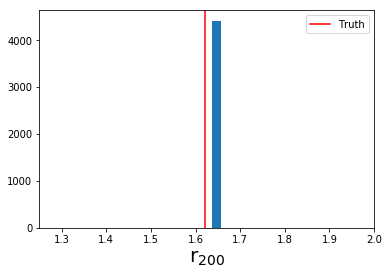

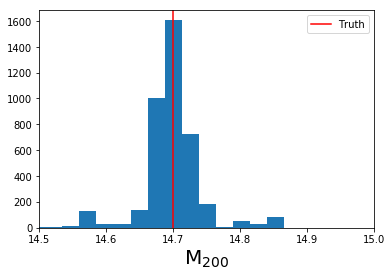

In [65]:
plt.hist(R200_fitted[wnormal],bins=50)
plt.axvline(R200_true.value, color='r', label='Truth')
plt.xlim(1.25,2.0)
plt.xlabel('r$_{200}$',fontsize=20)
plt.legend()
plt.show()
plt.hist(np.log10(M200_fitted[wnormal]),bins=600)
plt.axvline(np.log10(M200_true.value), color='r', label = 'Truth')
plt.xlim(14.5,15.00)
plt.xlabel('M$_{200}$',fontsize=20)
plt.legend()
plt.show()

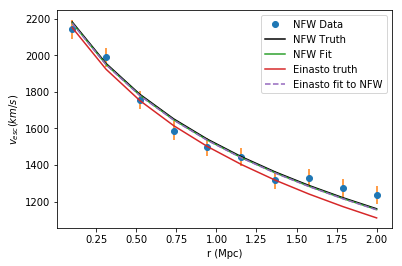

In [67]:
for i in range(len(z)):
    plt.plot(vesc_nfw_data_r[i],vesc_nfw_data[i],'o', label = 'NFW Data')
    plt.errorbar(vesc_nfw_data_r[i],vesc_nfw_data[i],yerr=vesc_nfw_data_err[i], linestyle='None')
for i in range(len(z)):
    plt.plot(vesc_nfw_truth_r[i],vesc_nfw_truth[i],'k', label = 'NFW Truth')
for i in range(len(z)):
    plt.plot(vesc_nfw_fit_r[i],vesc_nfw_fit[i],'-', label = 'NFW Fit ')

for i in range(len(z)):
    plt.plot(vesc_ein_truth_r[i],vesc_ein_truth[i],'-', label = 'Einasto truth ')
vesc_ein_nfw_fit_r,vesc_ein_nfw_fit = v_esc_NFW_M200(vesc_nfw_data_theta,z,np.repeat(M200_fitted_50,(1)),N,cosmo_params, cosmo_name,num_clus)
for i in range(len(z)):
    plt.plot(vesc_ein_nfw_fit_r[i],vesc_ein_nfw_fit[i],'--', label = 'Einasto fit to NFW')
plt.legend()
plt.xlabel('r (Mpc)')
plt.ylabel(r'$v_{esc} (km/s)$')
plt.show()

Notice that our expectation is that the Einasto is below the NFW using the truth values. The fitted Einasto is found to be low. 

Let's check to see whether this systematic meets our expectations from theory. Note that it could be worse if we instead use the Einasto fits directly instead of propogating through the NFW. We will check that later.

In [68]:
print 'Truth = ', 14.6989, 'NFW = ', 14.706659, 'Einasto = ', 14.694028695589644 

Truth =  14.6989 NFW =  14.706659 Einasto =  14.6940286956


We know the correction term, and so we can apply it to the original NFW Data:

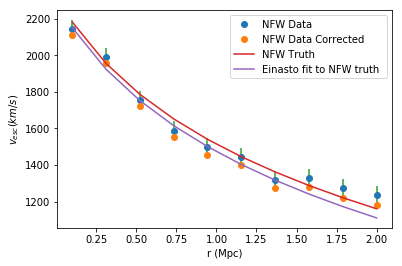

In [69]:
vesc_nfw_data_corr = vesc_nfw_data[0] - diff_fit*vesc_nfw_data[0]
vesc_nfw_data_corr = np.repeat(vesc_nfw_data_corr,(1))
for i in range(len(z)):
    plt.plot(vesc_nfw_data_r[i],vesc_nfw_data[i],'o', label = 'NFW Data')
    plt.plot(vesc_nfw_data_r[i],vesc_nfw_data_corr,'o', label = 'NFW Data Corrected')  
    plt.errorbar(vesc_nfw_data_r[i],vesc_nfw_data[i],yerr=vesc_nfw_data_err[i], linestyle='None')
r,truth = v_esc_NFW_M200(vesc_nfw_data_theta,z,M200_use,N,cosmo_params, cosmo_name,num_clus)
for i in range(len(z)):
    plt.plot(r[i],truth[i],'-', label = 'NFW Truth ')
for i in range(len(z)):
    plt.plot(vesc_ein_truth_r[i],vesc_ein_truth[i],'-', label = 'Einasto fit to NFW truth ')

plt.legend()
plt.xlabel('r (Mpc)')
plt.ylabel(r'$v_{esc} (km/s)$')
plt.show()

In [70]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(vesc_nfw_data_theta, vesc_nfw_data_corr, vesc_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
escape_functions_noastropy.py:84: RuntimeWarning: invalid value encountered in sqrt
  v_esc =  (-2.*phi_einasto(r,rho_0[i],h[i],n[i])+2.*phi_einasto(req,rho_0[i],h[i],n[i]) - q_z*(H_z**2.)*(r**2. - req**2.)  )**0.5
/usr/local/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:640: RuntimeWarning: invalid value encountered in power
  *arrays,

(array([[18.94447422, -6.17595105,  5.56835707],
        [17.995916  , -4.40873829,  4.29905659],
        [16.99514113, -3.36160513,  3.66214707],
        [15.76720215, -7.38789634,  5.18736405],
        [18.22923422, -4.85613754,  4.63552785],
        [18.65660782, -5.74174683,  5.29301405],
        [17.54372105, -3.97001895,  4.05024478],
        [18.04199647, -4.77782278,  4.63490255],
        [18.78181965, -6.00608525,  5.48466352],
        [18.30653266, -5.22841807,  4.96134941],
        [16.2138624 , -1.93168012,  2.4054495 ],
        [15.84208833, -3.77622116,  5.61762365],
        [16.58755708, -5.22393026,  6.3592244 ],
        [17.71756513, -4.30557253,  4.31495787],
        [18.55960752, -5.46562324,  5.07904905],
        [18.02558299, -4.62954234,  4.49951209],
        [18.25028336, -4.97025343,  4.73609589],
        [18.99561233, -6.06157707,  5.44782549],
        [18.59058722, -5.36726301,  4.9695685 ],
        [18.65988736, -5.75649442,  5.30032052],
        [17.79138345

(40, 1000, 3)


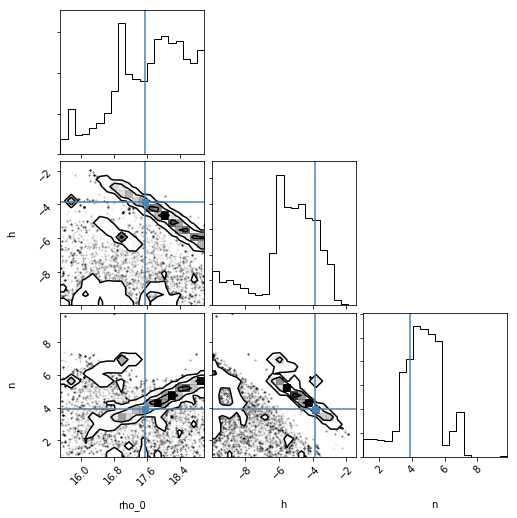

median(rho_0) =  17.804788280614282 +/- 0.7644509963860031 0.9583179479968784
median(log rho_0) =  1.2505368137806958 +/- 0.018257298652234466 0.024027892291080377
Truth:  [[17.55391637]]
median(h) =  -5.211543213428268 +/- 1.4353220492856607 1.568254249154796
Truth:  [[-3.83547094]]
median(n) =  4.578978803586837 +/- 1.0220516498474215 1.110259981267776
Truth:  [[3.91176066]]


In [71]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 3))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], labels=["rho_0", "h", "n"], truths = [np.log10(rho_0), np.log10(h),n])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
rho_0_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
rho_0_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
rho_0_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
rho_0_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
h_fit =  np.percentile(sampler.chain[:,burn:,1],percentile_array)
h_fit_50 =  np.percentile(sampler.chain[:,burn:,1],50)
h_fit_33 =  np.percentile(sampler.chain[:,burn:,1],33-16.5)
h_fit_67 =  np.percentile(sampler.chain[:,burn:,1],67+16.5)
n_fit =  np.percentile(sampler.chain[:,burn:,2],percentile_array)
n_fit_50 =  np.percentile(sampler.chain[:,burn:,2],50)
n_fit_33 =  np.percentile(sampler.chain[:,burn:,2],33-16.5)
n_fit_67 =  np.percentile(sampler.chain[:,burn:,2],67+16.5)
print 'median(rho_0) = ', rho_0_fit_50, '+/-', rho_0_fit_67-rho_0_fit_50, rho_0_fit_50-rho_0_fit_33
print 'median(log rho_0) = ', np.log10(rho_0_fit_50), '+/-', np.log10(rho_0_fit_67)-np.log10(rho_0_fit_50), np.log10(rho_0_fit_50) -np.log10(rho_0_fit_33)
sigma_rho_0_fit = (rho_0_fit_67-rho_0_fit_50 + rho_0_fit_50-rho_0_fit_33)/2.0
print 'Truth: ', np.log10(rho_0)
print 'median(h) = ', h_fit_50, '+/-', h_fit_67-h_fit_50, h_fit_50-h_fit_33
sigma_rho_s_fit = (h_fit_67-h_fit_50 + h_fit_50-h_fit_33)/2.0
print 'Truth: ', np.log10(h)
print 'median(n) = ', n_fit_50, '+/-', n_fit_67-n_fit_50, n_fit_50-n_fit_33
sigma_rho_s_fit = (n_fit_67-n_fit_50 + n_fit_50-n_fit_33)/2.0
print 'Truth: ',n

In [72]:
burn = 100
len_r = len(rho_ein_data_r)
len_r_interp = 1000
rho_crit = cosmo.critical_density(z[0])
rho_crit = rho_crit.to(u.solMass / u.Mpc**3)
rho_0_fitted = sampler.chain[:,burn:,0].flatten()
h_fitted = sampler.chain[:,burn:,1].flatten()
n_fitted = sampler.chain[:,burn:,2].flatten()
rand_vec = np.random.uniform(1,len(rho_0_fitted),size=5000).astype(int)
r_denfit = np.linspace(np.min(rho_ein_data_r),np.max(rho_ein_data_r),len_r).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.
r_interp = np.linspace(np.min(rho_ein_data_r),np.max(rho_ein_data_r),len_r_interp).round(3) #specify radius array for profiles. used in v_esc(r) funcs below.     
M200_fitted = []
R200_fitted = []
for i in range(len(rand_vec)):
        rho_r = []
        for j in range(len_r):
            rho_r = np.append(rho_r,4*np.pi*integrate.quad(rho_einasto_int,0,r_denfit[j],args=(10**rho_0_fitted[rand_vec[i]],10**h_fitted[rand_vec[i]], n_fitted[rand_vec[i]]))[0]/(4/3.*np.pi*(r_denfit[j]**3.0)))
#I think this needs r_denfit!        log10_rho_r_func = interp1d(rho_ein_data_r, np.log10(rho_r), kind='quadratic')
        log10_rho_r_interp = log10_rho_r_func(r_interp)
        w = np.where(log10_rho_r_interp < np.log10(200*rho_crit.value))[0]
        if (len(w) >0):
            R200_fitted = np.append(R200_fitted,r_interp[w[0]])
            M200_fitted = np.append(M200_fitted, 4*np.pi*integrate.quad(rho_einasto_int,0,r_interp[w[0]],args=(10**rho_0_fitted[rand_vec[i]],10**h_fitted[rand_vec[i]],n_fitted[rand_vec[i]]))[0])
wnormal = np.where(M200_fitted > 10)[0]
M200_fitted_50 =  np.percentile(M200_fitted[wnormal],50)
M200_fitted_33 =  np.percentile(M200_fitted[wnormal],33-16.5)
M200_fitted_67 =  np.percentile(M200_fitted[wnormal],67+16.5)
R200_fitted_50 =  np.percentile(R200_fitted[wnormal],50)
R200_fitted_33 =  np.percentile(R200_fitted[wnormal],33-16.5)
R200_fitted_67 =  np.percentile(R200_fitted[wnormal],67+16.5)
print 'median(M200_fitted) = ', M200_fitted_50, '+/-', M200_fitted_67-M200_fitted_50, M200_fitted_50-M200_fitted_33
print 'median(logM200_fitted) = ', np.log10(M200_fitted_50), '+/-', np.log10(M200_fitted_67)-np.log10(M200_fitted_50), np.log10(M200_fitted_50) -np.log10(M200_fitted_33)
sigma_logM200_fitted = (np.log10(M200_fitted_67)-np.log10(M200_fitted_50) + np.log10(M200_fitted_50)-np.log10(M200_fitted_33))/2.0
print 'median(R200_fitted) = ', R200_fitted_50, '+/-', R200_fitted_67-R200_fitted_50, R200_fitted_50-R200_fitted_33

print 'M200 Truth: ', np.log10(M200_true.value), z
print 'R200 Truth: ', R200_true.value

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.


median(M200_fitted) =  473642147605155.4 +/- 28393620085292.688 30604907634022.688
median(logM200_fitted) =  14.675450341641168 +/- 0.025284318048127474 0.029010108794564005
median(R200_fitted) =  1.637 +/- 0.0 0.0
M200 Truth:  14.698970004336019 [0.05]
R200 Truth:  1.62038576164


In [73]:
def lnprior(omega):
    p_M200 = omega[0]
    if not(13 < p_M200 < 17 ):
          return -np.inf
    return 0.0

In [74]:
def lnlike(omega, x, y, yerr): 
    p_theta_array = x
    p_z = z
    p_M200 = np.repeat(omega[0],len(p_z))
    p_N = N
    p_num_clus = num_clus
    p_cosmo_params = cosmo_params
    p_cosmo_name = cosmo_name
    ymodel_fixed = lambda p_theta_array,p_M200:v_esc_NFW_M200(p_theta_array,p_z,10**p_M200,p_N,p_cosmo_params,p_cosmo_name,p_num_clus)
    r_cosmo, ymodel = ymodel_fixed(p_theta_array,p_M200)
    inv_sigma2 = 1.0/(yerr**2)
#    print -0.5*(np.sum((y-ymodel)**2*inv_sigma2))
    return np.nan_to_num(-0.5*(np.sum((y-ymodel)**2*inv_sigma2)))

In [75]:
def lnprob(omega, x, y, yerr):
    lp = lnprior(omega)
    ll = lnlike(omega, x, y, yerr)
    if not np.isfinite(lp):
        return -np.inf
    if not np.isfinite(ll):
        return -np.inf    
    return lp + lnlike(omega, x, y, yerr)

In [77]:
ndim, nwalkers, nsteps = 1, 40, 500
p0 = np.transpose([np.random.uniform(13,17,size=nwalkers)])#print np.shape(p0)

In [78]:
pool = Pool(processes=4)     
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(vesc_nfw_data_theta, vesc_nfw_data_corr, vesc_nfw_data_err),pool=pool)
sampler.run_mcmc(p0, nsteps)

escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5
escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5
escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5
escape_functions_noastropy.py:147: RuntimeWarning: invalid value encountered in sqrt
  v_esc = (-2.*phi_nfw(r,rho_s,r_s) +2*phi_nfw(req,rho_s,r_s)-q_z*(H_z**2.)*(r**2 - req**2) )**0.5


(array([[14.64437141],
        [14.67078733],
        [14.6633462 ],
        [14.66955456],
        [14.66382426],
        [14.66284165],
        [14.65621299],
        [14.69866564],
        [14.66142827],
        [14.67734635],
        [14.65811376],
        [14.67016376],
        [14.6691748 ],
        [14.66356275],
        [14.68050008],
        [14.68034529],
        [14.67133272],
        [14.67417662],
        [14.66531323],
        [14.68720292],
        [14.66091621],
        [14.6684628 ],
        [14.67598282],
        [14.66940513],
        [14.65353851],
        [14.67655398],
        [14.66982612],
        [14.67139364],
        [14.6570736 ],
        [14.66979247],
        [14.66823243],
        [14.65447944],
        [14.68686713],
        [14.66342827],
        [14.6533504 ],
        [14.6566404 ],
        [14.66859961],
        [14.67789416],
        [14.67102656],
        [14.67148714]]),
 array([-5.72230905, -3.1391161 , -3.24746608, -3.12275681, -3.22565645,
     

(40, 500, 1)


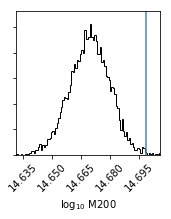

67
median(M200) =  14.669622828481685 +/- 0.009927006303316332 0.010317104972317637
median(M200/1e14) =  4.67329103916688 +/- 0.10805124429431423 0.10971045752538355
Truth:  [14.69897]


In [79]:
burn = 100
samples = sampler.chain[:, burn:, :].reshape((-1, 1))
print np.shape(sampler.chain)
fig = corner.corner(samples[:,:], bins=100, labels=["log$_{10}$ M200"], truths = [np.log10(M200_use)])
plt.show()
percentile_array = np.arange(33-16.5,67+16.5, 1.0)
print len(percentile_array)
M200_fit =  np.percentile(sampler.chain[:,burn:,0],percentile_array)
M200_fit_50 =  np.percentile(sampler.chain[:,burn:,0],50)
M200_fit_33 =  np.percentile(sampler.chain[:,burn:,0],33-16.5)
M200_fit_67 =  np.percentile(sampler.chain[:,burn:,0],67+16.5)
print 'median(M200) = ', M200_fit_50, '+/-', M200_fit_67-M200_fit_50, M200_fit_50-M200_fit_33
print 'median(M200/1e14) = ', 10**(M200_fit_50)/1e14, '+/-', 10**(M200_fit_67)/1e14-10**(M200_fit_50)/1e14, 10**(M200_fit_50)/1e14 -10**(M200_fit_33)/1e14
sigma_M200_fit = (M200_fit_67-M200_fit_50 + M200_fit_50-M200_fit_33)/2.0
print 'Truth: ', np.log10(M200_use)

In [80]:
print 'Truth = ', 14.699, 'NFW = ', 14.7067, 'Einasto (to NFW)= ', 14.694 , 'Einasto (to corrected)= ', 14.675, 'NFW (to correct) = ', 14.649

Truth =  14.699 NFW =  14.7067 Einasto (to NFW)=  14.694 Einasto (to corrected)=  14.675 NFW (to correct) =  14.649


What does this all mean?

Well, suppose the cluster has an underlying NFW mass density profile. If we infer the mass from the escape profile using an NFW form, we the answer to sub-percent accuracy (14.7067 - 14.699 = 0.007). If we infer this mass from the escape profile using an Einasto form, we also get sub-percent accuracy (14.699 - 14.694 =0.005 ). Both of these are below the 1% and 2% errors on the NFW/Einasto fits.

On the other hand, suppose the density is more Einasto-like, in that the density leads to an escape edge that is of the steeper Einasto form? If we fit the Einasto corrected escape profile with the Einasto model we find (14.699 -14.675 = 0.024) 2% accuracy, but this is within the 1 sigma fitting error of the Einasto formula. If we fit the NFW form to the Einasto-like escape-edge, we find  (14.699-14.649 =0.05), which is way outside the NFW errors of 0.01.


It may not be a good idea to use NFW $\rm {\bf at\ all}$ when making inference from the escape profile, since there is a bias that is well above the statistical threshold at 50km/s.